## Esercizio 7.1


Per capire la dimensione dei blocchi da utilizzare nella simulazione è necessario quantificare la correlazione che le misure di energia e pressione hanno in funzione degli step MC. Per fare questo ho misurato la funzione di autocorrelazione nel seguente modo:

1. Per prima cosa ho equilibrato il sistema, sono sufficienti poche centinaia di passi e già pressione ed energia hanno un andamento stabile. Ho utilizzato 1000 passi MC per l'equilibrio.

2. Poi ho misurato i valori istantanei di energia potenziale e pressione per $10^5$ passi MC.

3. Con questi valori ho misurato la funzione di autocorrelazione sia per pressione che per energia nei tre stati utilizzando la seguente formula:

$$
Ac_p(t)=\frac{\langle p(t^\prime)p(t+t^\prime)\rangle - \langle p\rangle^2}{\sigma_p^2}
$$

dove $p(t)$ è il valore istantaneo al tempo t e $\langle p\rangle$ è il valore medio e per tempi t intendo MC steps.

Ho misurato la $Ac(t)$ per diversi passi nei diversi casi:
- per lo stato solido 50 passi MC
- per lo stato liquido 100 passi MC
- per lo stato gassoso 150 passi MC

Sotto riporto lo script python dove ho eseguito il calcolo.


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def funcExp(x,a):
	return np.exp(-x/a)

with open("NVT_data/AC_error_data/Ist.pres.solid") as Spres:
	SP=np.loadtxt(Spres,usecols=(1),dtype=float,skiprows=1000)

with open("NVT_data/AC_error_data/Ist.epot.solid") as Sepot:
	SU=np.loadtxt(Sepot,usecols=(1),dtype=float,skiprows=1000)
    
with open("NVT_data/AC_error_data/Ist.pres.liquid") as Lpres:
	LP=np.loadtxt(Lpres,usecols=(1),dtype=float,skiprows=1000)
    
with open("NVT_data/AC_error_data/Ist.epot.liquid") as Lepot:
	LU=np.loadtxt(Lepot,usecols=(1),dtype=float,skiprows=1000)
    
with open("NVT_data/AC_error_data/Ist.pres.gas") as Gpres:
	GP=np.loadtxt(Gpres,usecols=(1),dtype=float,skiprows=1000)
    
with open("NVT_data/AC_error_data/Ist.epot.gas") as Gepot:
	GU=np.loadtxt(Gepot,usecols=(1),dtype=float,skiprows=1000)



N_media=90000

AC_SP=np.zeros(50)
AC_SU=np.zeros(50)
AC_LP=np.zeros(100)
AC_LU=np.zeros(100)
AC_GP=np.zeros(150)
AC_GU=np.zeros(150)

sigmaSP=(SP[:N_media]**2).sum()/(N_media) - (SP[:N_media].sum()/(N_media))**2
sigmaSU=(SU[:N_media]**2).sum()/(N_media) - (SU[:N_media].sum()/(N_media))**2

sigmaLP=(LP[:N_media]**2).sum()/(N_media) - (LP[:N_media].sum()/(N_media))**2
sigmaLU=(LU[:N_media]**2).sum()/(N_media) - (LU[:N_media].sum()/(N_media))**2

sigmaGP=(GP[:N_media]**2).sum()/(N_media) - (GP[:N_media].sum()/(N_media))**2
sigmaGU=(GU[:N_media]**2).sum()/(N_media) - (GU[:N_media].sum()/(N_media))**2



print("\n","Misuro la funzione di AC per la pressione e per l'energia stato solido per 50 passi MC ")

for tau1 in range(50):
    
	Psum1=0
	Psum2=0
	Psum3=0

	Usum1=0
	Usum2=0
	Usum3=0

	for i in range(0,N_media):
		Psum1+=SP[i]*SP[i+tau1]
		Psum2+=SP[i]
		Psum3+=SP[i+tau1]
        
		Usum1+=SU[i]*SU[i+tau1]
		Usum2+=SU[i]
		Usum3+=SU[i+tau1]        

	Psum1/=(N_media)
	Psum2/=(N_media)
	Psum3/=(N_media)

	Usum1/=(N_media)
	Usum2/=(N_media)
	Usum3/=(N_media)

	AC_SP[tau1]=(Psum1-Psum2*Psum3)/sigmaSP
	AC_SU[tau1]=(Usum1-Usum2*Usum3)/sigmaSU
    
print("\n","Misuro la funzione di AC per la pressione e per l'energia stato liquido per 100 passi MC") 
for tau2 in range(100):
    
	Psum1=0
	Psum2=0
	Psum3=0

	Usum1=0
	Usum2=0
	Usum3=0
    
	for i in range(0,N_media):

		Psum1+=LP[i]*LP[i+tau2]
		Psum2+=LP[i]
		Psum3+=LP[i+tau2]
        
		Usum1+=LU[i]*LU[i+tau2]
		Usum2+=LU[i]
		Usum3+=LU[i+tau2]

	Psum1/=(N_media)
	Psum2/=(N_media)
	Psum3/=(N_media)
    
	Usum1/=(N_media)
	Usum2/=(N_media)
	Usum3/=(N_media)
    
	AC_LP[tau2]=(Psum1-Psum2*Psum3)/sigmaLP
	AC_LU[tau2]=(Usum1-Usum2*Usum3)/sigmaLU
    
    
print("\n","Misuro la funzione di AC per la pressione e per l'energia stato gassoso per 150 passi MC")    
for tau3 in range(150):
	Psum1=0
	Psum2=0
	Psum3=0

	Usum1=0
	Usum2=0
	Usum3=0
    
	for i in range(0,N_media):

		Psum1+=GP[i]*GP[i+tau3]
		Psum2+=GP[i]
		Psum3+=GP[i+tau3]
        
		Usum1+=GU[i]*GU[i+tau3]
		Usum2+=GU[i]
		Usum3+=GU[i+tau3]        
	
	Psum1/=(N_media)
	Psum2/=(N_media)
	Psum3/=(N_media)

	Usum1/=(N_media)
	Usum2/=(N_media)
	Usum3/=(N_media)

    
	AC_GP[tau3]=(Psum1-Psum2*Psum3)/sigmaGP
	AC_GU[tau3]=(Usum1-Usum2*Usum3)/sigmaGU


    
x_SP=np.arange(tau1+1)
x_SU=np.arange(tau1+1)
x_LP=np.arange(tau2+1)
x_LU=np.arange(tau2+1)
x_GP=np.arange(tau3+1)
x_GU=np.arange(tau3+1)




 Misuro la funzione di AC per la pressione e per l'energia stato solido per 50 passi MC 

 Misuro la funzione di AC per la pressione e per l'energia stato liquido per 100 passi MC

 Misuro la funzione di AC per la pressione e per l'energia stato gassoso per 150 passi MC


Plotto ora le diverse funzioni di autocorrelazione.

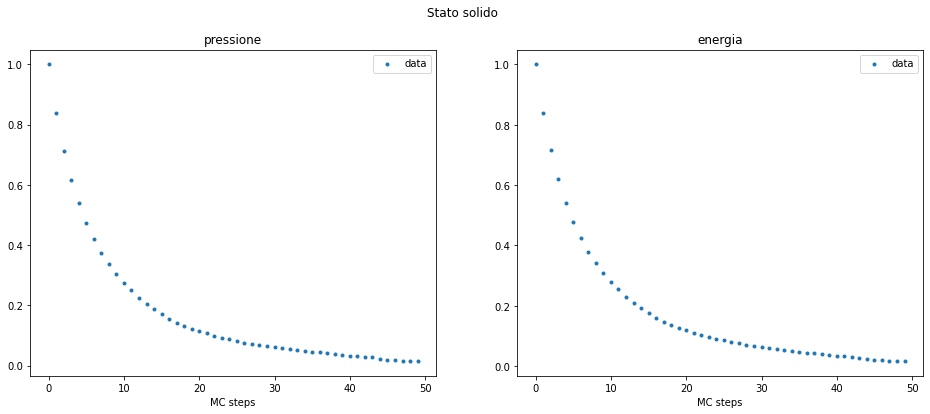

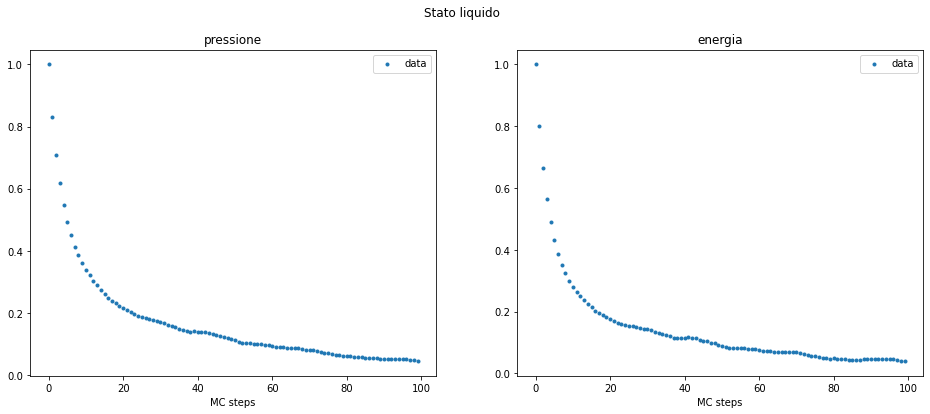

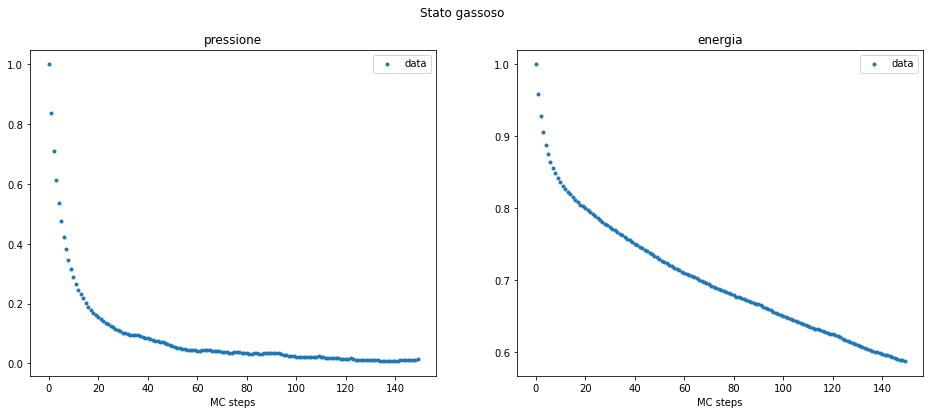

In [28]:
fig1=plt.figure(figsize=(16,6))
fig1.suptitle("Stato solido")
ax1=fig1.add_subplot(1,2,1)
ax2=fig1.add_subplot(1,2,2)

ax1.set_title('pressione')
ax1.scatter(x_SP,AC_SP,label='data',marker='.')
ax1.legend()
ax1.set_xlabel("MC steps")

ax2.set_title('energia')
ax2.scatter(x_SU,AC_SU,label='data',marker='.')
ax2.legend()
ax2.set_xlabel("MC steps")

plt.show()

fig2=plt.figure(figsize=(16,6))
fig2.suptitle("Stato liquido")
ax1=fig2.add_subplot(1,2,1)
ax2=fig2.add_subplot(1,2,2)

ax1.set_title('pressione')
ax1.scatter(x_LP,AC_LP,label='data',marker='.')
ax1.legend()
ax1.set_xlabel("MC steps")

ax2.set_title('energia')
ax2.scatter(x_LU,AC_LU,label='data',marker='.')
ax2.legend()
ax2.set_xlabel("MC steps")

plt.show()

fig3=plt.figure(figsize=(16,6))
fig3.suptitle("Stato gassoso")
ax1=fig3.add_subplot(1,2,1)
ax2=fig3.add_subplot(1,2,2)

ax1.set_title('pressione')
ax1.scatter(x_GP,AC_GP,label='data',marker='.')
ax1.legend()
ax1.set_xlabel("MC steps")

ax2.set_title('energia')
ax2.scatter(x_GU,AC_GU,label='data',marker='.')
ax2.legend()
ax2.set_xlabel("MC steps")

plt.show()


Come si vede dai grafici e come mi aspettavo, la funzione di autocorrelazione tende a zero molto velocemente in tutti i casi. Il più lento è il caso gassoso che per l'energia necessita di 150 passi per scorrelarsi completamente. Quindi per la dimensione dei blocchi utilizzo un numero molto maggiore di 150 passi in modo da all' interno di ciascun blocchi ci sia un grande numero di misure scorrelate.

### Errore al variare dei blocchi

Vediamo ora come varia l'errore sulle misure di pressione ed energia all' aumentare della taglia dei blocchi. Utilizzo gli stessi dati di prima e eseguo una media a blocchi variando il numero di blocchi sia per pressione che per energia nei tre stati.


In [29]:
M=100000 #passi montecarlo
N=10000 #numero di blocchi finale
k=20 #cicla sui blocchi partendo da 20


SPerr=np.zeros([23,3])
SUerr=np.zeros([23,3])

LPerr=np.zeros([23,3])
LUerr=np.zeros([23,3])

GPerr=np.zeros([23,3])
GUerr=np.zeros([23,3])


c=0
while(c<6):
    comp=0
    k=20
    while(k<N):
        ave=np.zeros(k)
        ave2=np.zeros(k)
        for i in range(k):
            Sum=0
            for j in range(int(i*M/k),int(i*M/k + M/k)):
                if(c==0):
                    Sum+=SP[j]
                elif(c==1):
                    Sum+=SU[j]
                elif(c==2):
                    Sum+=LP[j]
                elif(c==3):
                    Sum+=LU[j]
                elif(c==4):
                    Sum+=GP[j]
                else:
                    Sum+=GU[j]

            ave[i]=Sum/float(M/k)
            ave2[i]=ave[i]**2
        sum_ave= ave.sum()/float(k)
        sum_ave2=ave2.sum()/float(k)
        err=np.sqrt((sum_ave2-sum_ave**2)/k)
        if(c==0):
            SPerr[comp,0]=ave[k-1]
            SPerr[comp,1]=err
            SPerr[comp,2]=M/k
        elif(c==1):
            SUerr[comp,0]=ave[k-1]
            SUerr[comp,1]=err
            SUerr[comp,2]=M/k
            
        elif(c==2):
            LPerr[comp,0]=ave[k-1]
            LPerr[comp,1]=err
            LPerr[comp,2]=M/k
            
        elif(c==3):
            LUerr[comp,0]=ave[k-1]
            LUerr[comp,1]=err
            LUerr[comp,2]=M/k
            
        elif(c==4):
            GPerr[comp,0]=ave[k-1]
            GPerr[comp,1]=err
            GPerr[comp,2]=M/k
            
        else:
            GUerr[comp,0]=ave[k-1]
            GUerr[comp,1]=err
            GUerr[comp,2]=M/k   

        while(1<2):
            k+=1
            if(M%k==0):
                comp+=1
                break
    c+=1


Plotto ora gli errori in funzione della dimensione dei blocchi.

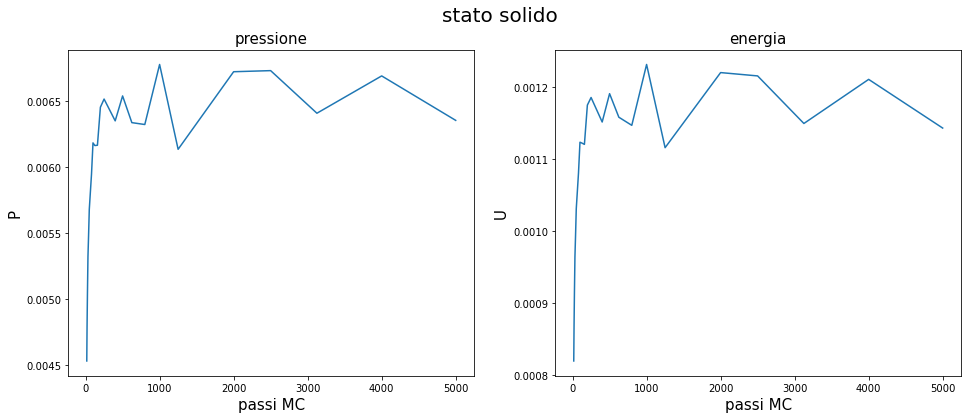

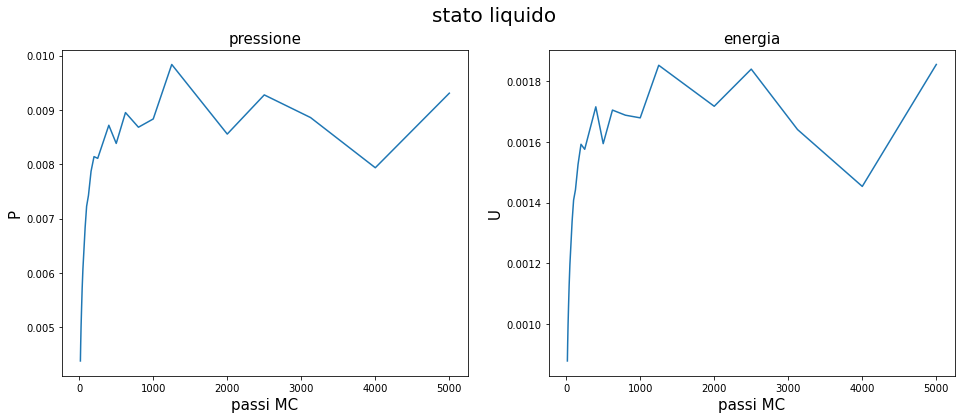

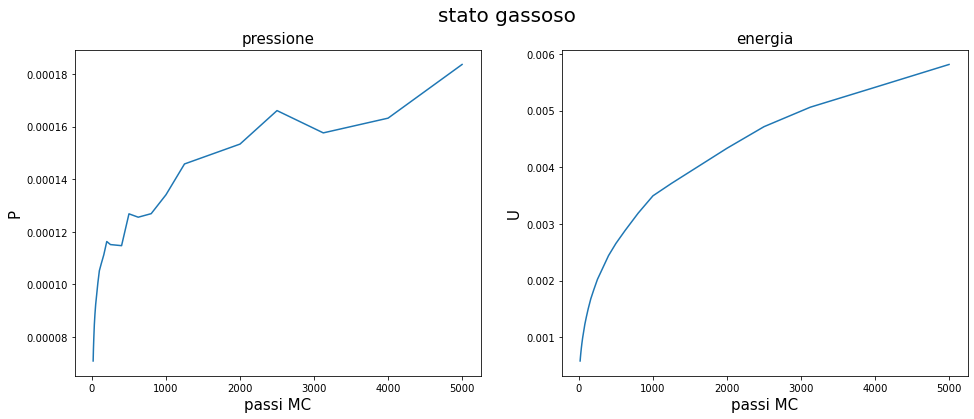

In [30]:


ind1=SPerr[:,2].argsort()
SPerr=SPerr[ind1]
ind2=SUerr[:,2].argsort()
SUerr=SUerr[ind2]

ind3=LPerr[:,2].argsort()
LPerr=LPerr[ind3]
ind4=LUerr[:,2].argsort()
LUerr=LUerr[ind4]

ind5=GPerr[:,2].argsort()
GPerr=GPerr[ind5]
ind6=GUerr[:,2].argsort()
GUerr=GUerr[ind6]

fig1=plt.figure(figsize=(16,6))
fig1.suptitle("stato solido",fontsize=20)
ax1=fig1.add_subplot(1,2,1)
ax2=fig1.add_subplot(1,2,2)
ax1.plot(SPerr[:,2],SPerr[:,1])
ax2.plot(SUerr[:,2],SUerr[:,1])
ax1.set_title("pressione",fontsize=15)
ax2.set_title("energia",fontsize=15)
ax1.set_xlabel("passi MC",fontsize=15)
ax2.set_xlabel("passi MC",fontsize=15)
ax1.set_ylabel("P",fontsize=15)
ax2.set_ylabel("U",fontsize=15)


plt.show()



fig2=plt.figure(figsize=(16,6))
fig2.suptitle("stato liquido",fontsize=20)
ax1=fig2.add_subplot(1,2,1)
ax2=fig2.add_subplot(1,2,2)
ax1.plot(LPerr[:,2],LPerr[:,1])
ax2.plot(LUerr[:,2],LUerr[:,1])
ax1.set_title("pressione",fontsize=15)
ax2.set_title("energia",fontsize=15)
ax1.set_xlabel("passi MC",fontsize=15)
ax2.set_xlabel("passi MC",fontsize=15)
ax1.set_ylabel("P",fontsize=15)
ax2.set_ylabel("U",fontsize=15)



plt.show()


fig3=plt.figure(figsize=(16,6))
fig3.suptitle("stato gassoso",fontsize=20)
ax1=fig3.add_subplot(1,2,1)
ax2=fig3.add_subplot(1,2,2)
ax1.plot(GPerr[:,2],GPerr[:,1])
ax2.plot(GUerr[:,2],GUerr[:,1])
ax1.set_title("pressione",fontsize=15)
ax2.set_title("energia",fontsize=15)
ax1.set_xlabel("passi MC",fontsize=15)
ax2.set_xlabel("passi MC",fontsize=15)
ax1.set_ylabel("P",fontsize=15)
ax2.set_ylabel("U",fontsize=15)



plt.show()

I grafici non sono chiarissimi, (probabilmente ho misurato gli errori per troppi pochi valori di taglia dei blocchi) ma comunque si intuisce che quando la taglia dei blocchi diventa sufficientemente grande l'errore si stabilizza. Il valore ideale della dimensione è proprio il punto in corripondenza del quale l'errore non aumenta più. In questo caso guardando i grafici dello stato liquido e gassoso, ho fissato la dimensione dei blocchi a 1000.